In [1]:
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip

--2024-12-30 07:46:23--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 3.5.25.145, 54.231.164.145, 16.182.43.57, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|3.5.25.145|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘annotations_trainval2017.zip’

annotations_trainva 100%[===================>] 241.19M  96.1MB/s    in 2.5s    

2024-12-30 07:46:25 (96.1 MB/s) - ‘annotations_trainval2017.zip’ saved [252907541/252907541]



In [2]:
!wget http://images.cocodataset.org/zips/val2017.zip

--2024-12-30 07:46:25--  http://images.cocodataset.org/zips/val2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 3.5.25.145, 54.231.164.145, 16.182.43.57, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|3.5.25.145|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 815585330 (778M) [application/zip]
Saving to: ‘val2017.zip’

val2017.zip         100%[===================>] 777.80M  95.1MB/s    in 8.1s    

2024-12-30 07:46:34 (95.5 MB/s) - ‘val2017.zip’ saved [815585330/815585330]



In [3]:
!unzip val2017.zip

Streaming output truncated to the last 5000 lines.
 extracting: val2017/000000212226.jpg  
 extracting: val2017/000000231527.jpg  
 extracting: val2017/000000578922.jpg  
 extracting: val2017/000000062808.jpg  
 extracting: val2017/000000119038.jpg  
 extracting: val2017/000000114871.jpg  
 extracting: val2017/000000463918.jpg  
 extracting: val2017/000000365745.jpg  
 extracting: val2017/000000320425.jpg  
 extracting: val2017/000000481404.jpg  
 extracting: val2017/000000314294.jpg  
 extracting: val2017/000000335328.jpg  
 extracting: val2017/000000513688.jpg  
 extracting: val2017/000000158548.jpg  
 extracting: val2017/000000132116.jpg  
 extracting: val2017/000000415238.jpg  
 extracting: val2017/000000321333.jpg  
 extracting: val2017/000000081738.jpg  
 extracting: val2017/000000577584.jpg  
 extracting: val2017/000000346905.jpg  
 extracting: val2017/000000433980.jpg  
 extracting: val2017/000000228144.jpg  
 extracting: val2017/000000041872.jpg  
 extracting: val2017/00000011

In [4]:
!unzip annotations_trainval2017.zip

Archive:  annotations_trainval2017.zip
  inflating: annotations/instances_train2017.json  
  inflating: annotations/instances_val2017.json  
  inflating: annotations/captions_train2017.json  
  inflating: annotations/captions_val2017.json  
  inflating: annotations/person_keypoints_train2017.json  
  inflating: annotations/person_keypoints_val2017.json  


In [5]:
!pip install pycocotools ultralytics gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 904.3/904.3 kB 34.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.4/320.4 kB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 54.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.5 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


**1. Instalasi dan Import Library**

In [6]:
# Import modul dan library yang dibutuhkan
import os
import json
import torch
import numpy as np  # Impor NumPy
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from ultralytics import YOLO
from torchvision.ops import box_iou  # Impor box_iou dari torchvision
import gradio as gr  # Impor Gradio
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


**2. Inisialisasi Device dan Model**

In [7]:
# Atur device ke GPU jika tersedia, jika tidak, gunakan CPU
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

# Load model YOLOv8 pre-trained
model_yolo = YOLO('yolov8n.pt')  # Anda bisa memilih model lain seperti 'yolov8s.pt', 'yolov8m.pt', dll.


100%|██████████| 6.25M/6.25M [00:00<00:00, 240MB/s]


**3. Fungsi Deteksi Objek**

In [8]:
# Path folder COCO val2017
val2017_path = "val2017"  # Ubah ke path folder val2017 Anda
annotations_path = "annotations/instances_val2017.json"  # File JSON ground truth COCO

# Load ground truth COCO
with open(annotations_path, "r") as f:
    coco_data = json.load(f)

# Fungsi untuk mendapatkan ground truth dari file JSON COCO
def get_ground_truth(coco_data, image_id):
    annotations = [ann for ann in coco_data["annotations"] if ann["image_id"] == image_id and ann["category_id"] == 1]  # Hanya ambil "person"
    boxes = []
    labels = []
    for ann in annotations:
        bbox = ann["bbox"]
        # COCO format bbox [x, y, width, height] -> [x1, y1, x2, y2]
        x1, y1, w, h = bbox
        x2 = x1 + w
        y2 = y1 + h
        boxes.append([x1, y1, x2, y2])
        labels.append(ann["category_id"])
    return {"boxes": torch.tensor(boxes, dtype=torch.float32), "labels": torch.tensor(labels)}


**4. Fungsi Visualisasi Hasil**


image 1/1 /content/val2017/000000000139.jpg: 448x640 1 person, 4 chairs, 1 tv, 446.0ms
Speed: 10.5ms preprocess, 446.0ms inference, 28.0ms postprocess per image at shape (1, 3, 448, 640)
Visualizing prediction for 000000000139.jpg...


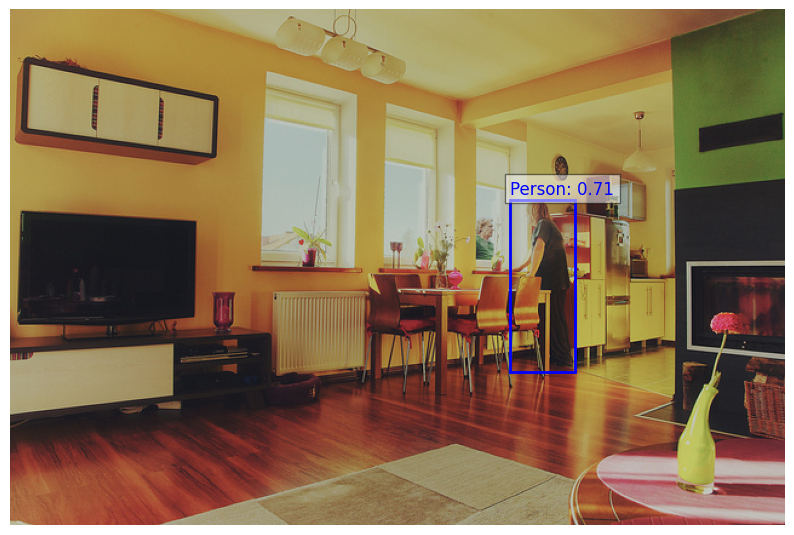

Processed 1/500: 000000000139.jpg

image 1/1 /content/val2017/000000000785.jpg: 448x640 1 person, 1 skis, 288.0ms
Speed: 2.3ms preprocess, 288.0ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)
Visualizing prediction for 000000000785.jpg...


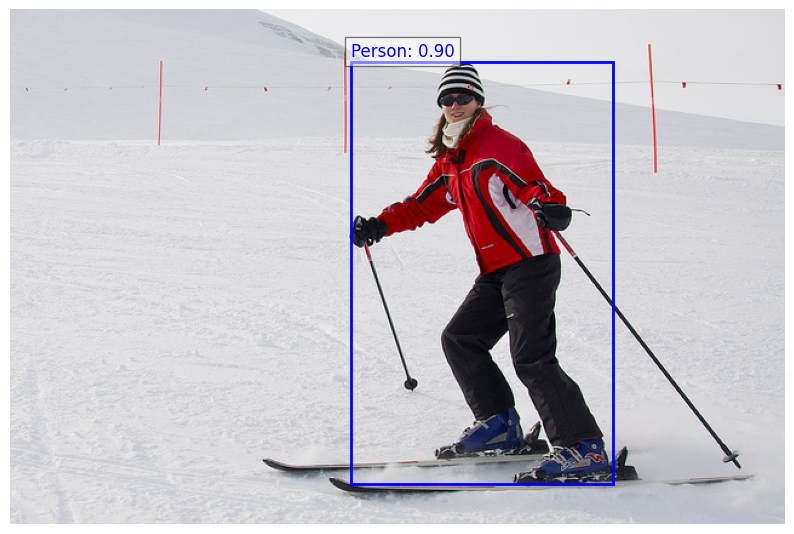

Processed 2/500: 000000000785.jpg

image 1/1 /content/val2017/000000000872.jpg: 640x640 2 persons, 429.1ms
Speed: 3.1ms preprocess, 429.1ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)
Visualizing prediction for 000000000872.jpg...


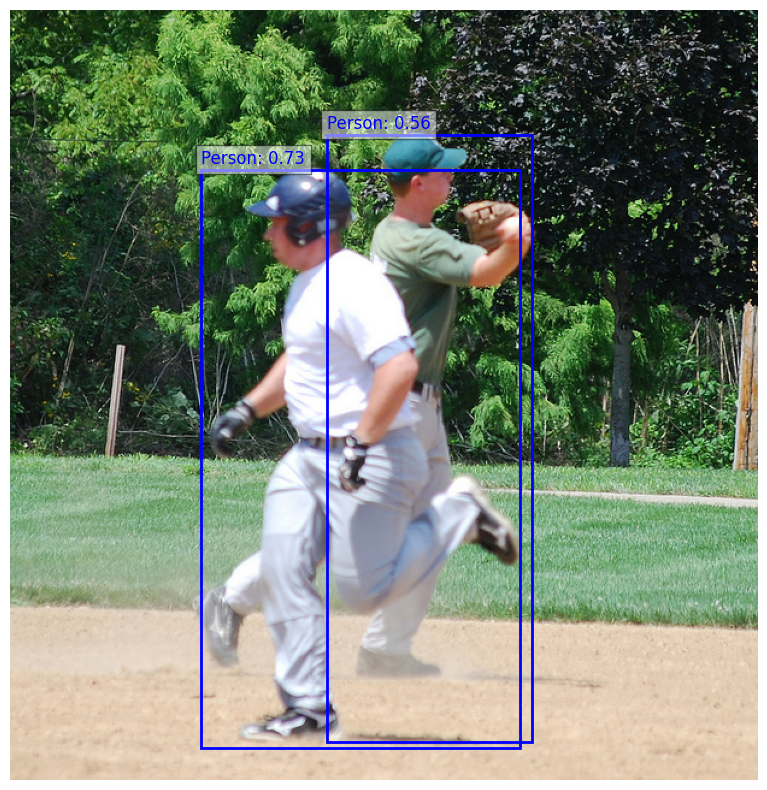

Processed 3/500: 000000000872.jpg

image 1/1 /content/val2017/000000000885.jpg: 448x640 3 persons, 1 tennis racket, 256.1ms
Speed: 2.3ms preprocess, 256.1ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)
Processed 4/500: 000000000885.jpg

image 1/1 /content/val2017/000000001000.jpg: 480x640 10 persons, 314.8ms
Speed: 2.7ms preprocess, 314.8ms inference, 4.9ms postprocess per image at shape (1, 3, 480, 640)
Processed 5/500: 000000001000.jpg

image 1/1 /content/val2017/000000001268.jpg: 448x640 4 persons, 1 bird, 2 handbags, 250.1ms
Speed: 2.6ms preprocess, 250.1ms inference, 1.9ms postprocess per image at shape (1, 3, 448, 640)
Processed 6/500: 000000001268.jpg

image 1/1 /content/val2017/000000001296.jpg: 640x448 1 person, 282.7ms
Speed: 2.5ms preprocess, 282.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)
Processed 7/500: 000000001296.jpg

image 1/1 /content/val2017/000000001353.jpg: 640x480 2 persons, 275.6ms
Speed: 9.0ms preprocess, 275.6ms inf

In [9]:
# Dapatkan daftar file gambar yang mengandung "person"
image_files_with_person = []
for image in coco_data["images"]:
    image_id = image["id"]
    # Cek apakah gambar ini mengandung anotasi "person"
    has_person = any(ann["category_id"] == 1 for ann in coco_data["annotations"] if ann["image_id"] == image_id)
    if has_person:
        image_files_with_person.append(image["file_name"])

# Ambil hanya 100 gambar yang mengandung "person"
image_files = sorted(image_files_with_person)[:500]  # Batasi hanya 500 gambar
predictions = []
ground_truths = []

# Fungsi untuk mendeteksi objek "person" menggunakan YOLOv8
def detect_person_yolo(image_path):
    results = model_yolo.predict(image_path, conf=0.5)  # Set confidence threshold sesuai kebutuhan
    predictions = results[0]  # Ambil hasil prediksi pertama

    # Filter hasil prediksi hanya untuk label "person" (label = 0 di YOLOv8)
    person_predictions = {
        "boxes": [],
        "scores": [],
        "labels": []
    }
    for box, score, label in zip(predictions.boxes.xyxy, predictions.boxes.conf, predictions.boxes.cls):
        if label == 0 and score > 0.5:  # Label "person" dan skor > 0.5
            person_predictions["boxes"].append(box)
            person_predictions["scores"].append(score)
            person_predictions["labels"].append(label)

    return person_predictions, Image.open(image_path)  # Mengembalikan prediksi dan gambar asli

# Fungsi untuk menampilkan hasil prediksi
def plot_predictions(image, predictions):
    """Visualisasi hasil prediksi."""
    plt.figure(figsize=(10, 10))
    plt.imshow(image)

    # Jika ada prediksi, gambarkan bounding box
    for box, score in zip(predictions["boxes"], predictions["scores"]):
        coords = box.cpu().numpy()
        x1, y1, x2, y2 = coords
        rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor='blue', facecolor='none')
        plt.gca().add_patch(rect)
        plt.text(x1, y1 - 5, f'Person: {score:.2f}', color='blue', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

    plt.axis('off')
    plt.show()

# Prediksi pada 100 gambar
for idx, image_file in enumerate(image_files):
    image_path = os.path.join(val2017_path, image_file)
    image_id = int(image_file.split(".")[0])  # Asumsi nama file adalah ID gambar

    # Deteksi objek
    pred, image = detect_person_yolo(image_path)
    predictions.append(pred)
    # Ambil ground truth
    gt = get_ground_truth(coco_data, image_id)
    ground_truths.append(gt)

    # Visualisasi hanya untuk 3 gambar pertama
    if idx < 3:
        print(f"Visualizing prediction for {image_file}...")
        plot_predictions(image, pred)

    print(f"Processed {idx + 1}/{len(image_files)}: {image_file}")


**5. Membaca Data dan Ground Truth**

In [10]:
def compute_average_precision(predictions, ground_truths, iou_threshold=0.5):
    all_scores = []
    all_labels = []
    all_detections = []
    all_gt_boxes = []

    for pred, gt in zip(predictions, ground_truths):
        gt_boxes = gt["boxes"]
        gt_labels = gt["labels"]

        if isinstance(gt_boxes, list):
            gt_boxes = torch.tensor(gt_boxes, dtype=torch.float32)
        if isinstance(gt_labels, list):
            gt_labels = torch.tensor(gt_labels, dtype=torch.int64)

        if len(gt_labels) > 0:
            person_indices = gt_labels == 1
            gt_boxes = gt_boxes[person_indices] if len(gt_boxes) > 0 else torch.empty((0, 4))
            gt_labels = gt_labels[person_indices]
        else:
            gt_boxes = torch.empty((0, 4))
            gt_labels = torch.empty(0, dtype=torch.int64)

        pred_boxes = pred["boxes"]
        pred_scores = pred["scores"]
        pred_labels = pred["labels"]

        all_gt_boxes.append(gt_boxes)
        all_detections.append(pred_boxes)
        all_scores.append(pred_scores)
        all_labels.append(pred_labels)

    return all_scores, all_labels, all_detections, all_gt_boxes

def compute_map(all_scores, all_labels, all_detections, all_gt_boxes, iou_threshold=0.5):
    average_precision_list = []

    for scores, labels, detections, gt_boxes in zip(all_scores, all_labels, all_detections, all_gt_boxes):
        scores = torch.tensor(scores) if isinstance(scores, list) else scores
        gt_boxes = gt_boxes.to(device)

        if len(detections) == 0:
            average_precision_list.append(0)
            continue

        sorted_indices = torch.argsort(scores, descending=True)
        sorted_detections = [detections[i] for i in sorted_indices]
        sorted_scores = scores[sorted_indices]
        sorted_labels = [labels[i] for i in sorted_indices]

        tp = np.zeros(len(sorted_detections))
        fp = np.zeros(len(sorted_detections))
        total_gt = len(gt_boxes)

        for idx, det in enumerate(sorted_detections):
            if gt_boxes.nelement() == 0:
                fp[idx] = 1
                continue

            iou_values = box_iou(det.unsqueeze(0), gt_boxes)
            max_iou, max_iou_idx = iou_values.max(0)
            max_iou_value = max_iou.item() if max_iou.numel() == 1 else max_iou.max().item()

            if max_iou_value >= iou_threshold:
                tp[idx] = 1
            else:
                fp[idx] = 1

        tp_cumsum = np.cumsum(tp)
        fp_cumsum = np.cumsum(fp)

        if len(tp_cumsum) > 0 and len(fp_cumsum) > 0:
            precision = tp_cumsum / (tp_cumsum + fp_cumsum) if tp_cumsum[-1] + fp_cumsum[-1] > 0 else 0
            average_precision = np.mean(precision)
        else:
            average_precision = 0

        average_precision_list.append(average_precision)

    mAP = np.mean(average_precision_list)
    return mAP

# Contoh penggunaan untuk menghitung mAP
all_scores, all_labels, all_detections, all_gt_boxes = compute_average_precision(predictions, ground_truths)
map_score = compute_map(all_scores, all_labels, all_detections, all_gt_boxes)

# Output hasil
print(f"mAP: {map_score:.4f}")


mAP: 0.8405


**6. Proses Deteksi dan Visualisasi**

In [11]:
def compute_precision_recall(all_scores, all_labels, all_detections, all_gt_boxes, iou_threshold=0.5):
    precision_list = []
    recall_list = []

    for scores, labels, detections, gt_boxes in zip(all_scores, all_labels, all_detections, all_gt_boxes):
        scores = torch.tensor(scores) if isinstance(scores, list) else scores
        gt_boxes = gt_boxes.to(device)

        if len(detections) == 0:
            precision_list.append(0)
            recall_list.append(0)
            continue

        sorted_indices = torch.argsort(scores, descending=True)
        sorted_detections = [detections[i] for i in sorted_indices]
        sorted_scores = scores[sorted_indices]
        sorted_labels = [labels[i] for i in sorted_indices]

        tp = np.zeros(len(sorted_detections))
        fp = np.zeros(len(sorted_detections))
        total_gt = len(gt_boxes)

        for idx, det in enumerate(sorted_detections):
            if gt_boxes.nelement() == 0:
                fp[idx] = 1
                continue

            iou_values = box_iou(det.unsqueeze(0), gt_boxes)
            max_iou, max_iou_idx = iou_values.max(0)
            max_iou_value = max_iou.item() if max_iou.numel() == 1 else max_iou.max().item()

            if max_iou_value >= iou_threshold:
                tp[idx] = 1
            else:
                fp[idx] = 1

        tp_cumsum = np.cumsum(tp)
        fp_cumsum = np.cumsum(fp)

        if len(tp_cumsum) > 0 and len(fp_cumsum) > 0:
            precision = tp_cumsum / (tp_cumsum + fp_cumsum) if tp_cumsum[-1] + fp_cumsum[-1] > 0 else 0
            recall = tp_cumsum / total_gt if total_gt > 0 else 0
        else:
            precision = 0
            recall = 0

        precision_list.append(precision)
        recall_list.append(recall)

    return precision_list, recall_list

# Hitung precision dan recall
precision_scores, recall_scores = compute_precision_recall(all_scores, all_labels, all_detections, all_gt_boxes)

# Output hasil
precision_value = precision_scores[0].item() if isinstance(precision_scores[0], np.ndarray) else precision_scores[0]
recall_value = recall_scores[0].item() if isinstance(recall_scores[0], np.ndarray) else recall_scores[0]

print(f"Precision: {precision_value:.4f}, Recall: {recall_value:.4f}")


Precision: 1.0000, Recall: 0.5000


**7. Evaluasi Hasil mAP**

In [12]:
# Evaluasi menggunakan COCO API
coco_gt = COCO(annotations_path)

# Simpan hasil prediksi ke format COCO untuk evaluasi
def convert_to_coco_format(predictions, image_ids):
    coco_predictions = []
    for image_id, pred in zip(image_ids, predictions):
        boxes = pred.get("boxes", [])
        scores = pred.get("scores", [])
        labels = pred.get("labels", [])

        if isinstance(boxes, list) and len(boxes) > 0:
            boxes = torch.stack([b.squeeze() for b in boxes]) if len(boxes) > 0 else torch.empty((0, 4))
        else:
            continue  # Lewati jika tidak ada boxes

        if isinstance(scores, list) and len(scores) > 0:
            scores = torch.tensor([s.item() for s in scores], dtype=torch.float32)
        else:
            continue  # Lewati jika tidak ada scores

        if isinstance(labels, list) and len(labels) > 0:
            labels = torch.tensor([l.item() for l in labels], dtype=torch.int64)
        else:
            continue  # Lewati jika tidak ada labels

        boxes = boxes.cpu().numpy()
        scores = scores.cpu().numpy()
        labels = labels.cpu().numpy()

        for box, score, label in zip(boxes, scores, labels):
            if len(box) == 4:
                x1, y1, x2, y2 = box
                width = x2 - x1
                height = y2 - y1
                coco_predictions.append({
                    "image_id": image_id,
                    "category_id": int(label),
                    "bbox": [float(x1), float(y1), float(width), float(height)],
                    "score": float(score)
                })

    return coco_predictions

# Dapatkan ID gambar dari file
image_ids = [int(image_file.split(".")[0]) for image_file in image_files]

# Konversi prediksi ke format COCO
coco_predictions = convert_to_coco_format(predictions, image_ids)

# Simpan prediksi ke file JSON (opsional jika ingin melihat hasilnya)
predictions_path = "predictions.json"
with open(predictions_path, "w") as f:
    json.dump(coco_predictions, f)

# Load prediksi menggunakan COCO API
coco_dt = coco_gt.loadRes(predictions_path)

# Evaluasi mAP menggunakan COCOeval
coco_eval = COCOeval(coco_gt, coco_dt, "bbox")
coco_eval.evaluate()
coco_eval.accumulate()
coco_eval.summarize()

# Output utama
print(f"mAP@[.5:.95]: {coco_eval.stats[0]:.4f}")
print(f"AP at IoU=0.50: {coco_eval.stats[1]:.4f}")
print(f"AP at IoU=0.75: {coco_eval.stats[2]:.4f}")


loading annotations into memory...
Done (t=1.36s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.02s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=11.85s).
Accumulating evaluation results...
DONE (t=1.65s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDet

**8. Evaluasi Hasil Precision and Recall**

In [13]:
# Fungsi utama untuk Gradio
def detect_and_plot(selected_image):
    try:
        # Path lengkap ke gambar yang dipilih
        image_path = os.path.join(val2017_path, selected_image)

        # Deteksi objek
        predictions, image = detect_person_yolo(image_path)

        # Plot hasil
        plot_predictions(image, predictions)

        # Simpan gambar dengan bounding box
        output_path = "output.png"  # Path untuk menyimpan gambar hasil deteksi
        plt.savefig(output_path)  # Simpan gambar dengan hasil deteksi
        plt.close()  # Tutup plot untuk menghindari tampilan ganda

        return output_path  # Kembalikan path gambar yang disimpan
    except Exception as e:
        return f"Error: {str(e)}"  # Kembalikan pesan kesalahan jika terjadi

# Membuat antarmuka Gradio
iface = gr.Interface(
    fn=detect_and_plot,  # Fungsi yang akan dipanggil
    inputs=gr.Dropdown(choices=image_files, label="Pilih Gambar"),  # Dropdown untuk memilih gambar
    outputs=gr.Image(type="filepath"),  # Output gambar dengan deteksi
    title="Deteksi Objek dengan YOLOv8",
    description="Pilih gambar dari dataset untuk mendeteksi objek 'person' menggunakan model YOLOv8."
)

# Jalankan antarmuka
iface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://e6953f4778acd95844.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


**9. Evaluasi Menggunakan COCO API**